# 강의 : https://www.edwith.org/boostcourse-ds-511/joinLectures/40396
# 강의자 repo : https://github.com/corazzon/boostcourse-ds-511

# 2.1 EDA를 통해 데이터 탐색하기

## 환경 세팅

In [1]:
!git clone https://github.com/corazzon/boostcourse-ds-511.git


import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')


diabetes_df = pd.read_csv('boostcourse-ds-511/data/diabetes.csv')
diabetes_df['Pregnancies_high'] = (diabetes_df['Pregnancies'] > 6).astype(int)
print(diabetes_df.shape)
diabetes_df.head(3)

fatal: destination path 'boostcourse-ds-511' already exists and is not an empty directory.
(768, 10)


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high
0,6,148,72,35,0,33.6,0.627,50,1,0
1,1,85,66,29,0,26.6,0.351,31,0,0
2,8,183,64,0,0,23.3,0.672,32,1,1


## 2.1.4 두 개의 변수를 정답값에 따라 시각화 해보기
- 다변량 시각화
- barplot
- boxplot
- violinplot
- swarmplot

### 1) 당뇨병 환자-비환자 집단 간의 속성별 평균값 비교 (barplot)
- 막대 그래프의 검은 선은 데이터 일부를 샘플링해 구한 95%의 신뢰구간

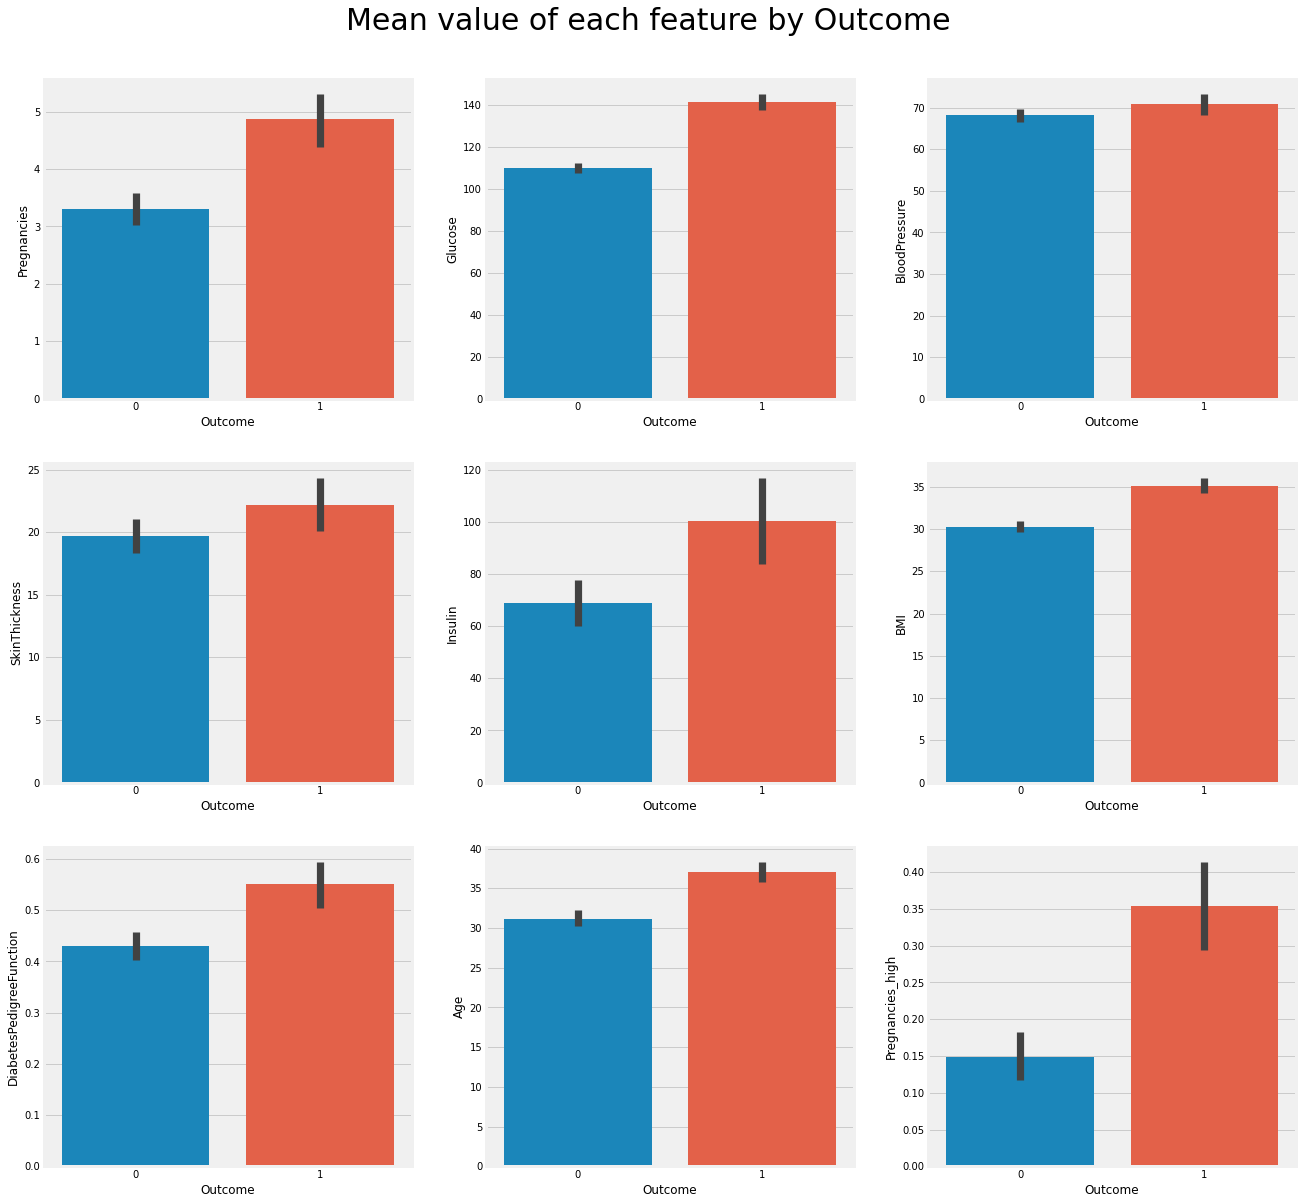

In [2]:
fig, ax = plt.subplots(3, 3, figsize=(20, 20))
ax = ax.ravel()
plt.suptitle('Mean value of each feature by Outcome', size=30, y=0.93)

for idx, col in enumerate(diabetes_df.drop(columns='Outcome').columns):
  sns.barplot(x='Outcome', y=col, data=diabetes_df, ax=ax[idx])

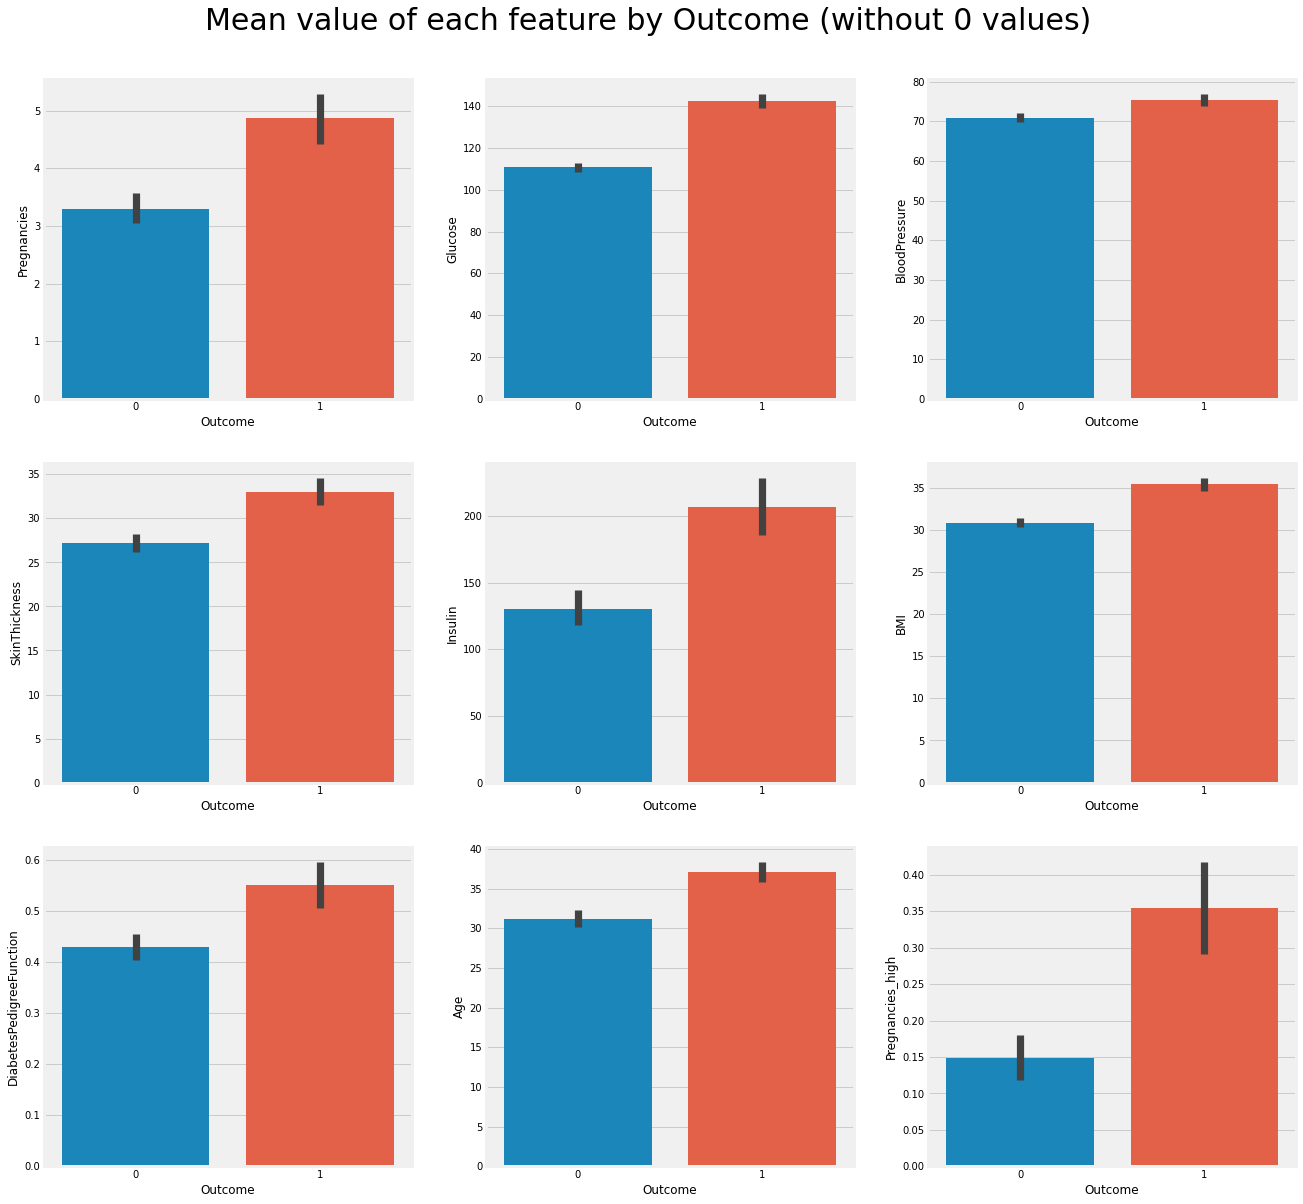

In [3]:
# 결측치/이상치(0값) 제거
fig, ax = plt.subplots(3, 3, figsize=(20, 20))
ax = ax.ravel()
plt.suptitle('Mean value of each feature by Outcome (without 0 values)',
             size=30, y=0.93)

for idx, col in enumerate(diabetes_df.drop(columns='Outcome').columns):
  if col in ['Pregnancies', 'Pregnancies_high']:
    sns.barplot(x='Outcome', y=col, data=diabetes_df, ax=ax[idx])
  else:
    sns.barplot(x='Outcome', y=col, data=diabetes_df[diabetes_df[col] != 0], ax=ax[idx])

- 대부분의 속성에서 당뇨병 환자들의 평균 수치가 더 높게 나타남
- 혈압(BloodPressure), BMI 지수(BMI), 연령(Age) 등의 속성에서는 상대적으로 환자-비환자 간의 평균 차이가 적은 것으로 보임
- 결측치/이상치라고 할 수 있는 0값을 제외한 경우에도 환자-비환자 집단의 평균은 크게 달라지지 않는 것으로 보임

### 2) 임신 횟수별 환자-비환자 집단 간의 속성별 평균값 비교 (barplot)
- 두 속성의 조합(임신 횟수 & 다른 속성)이 당뇨병 발병율에 미치는 영향 시각화

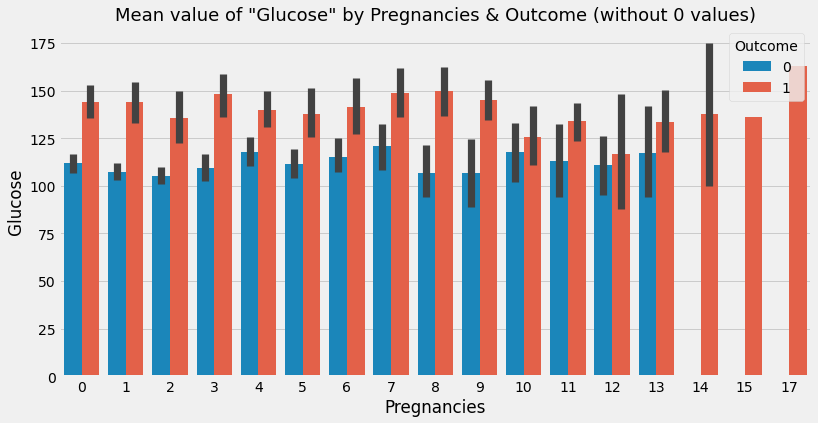

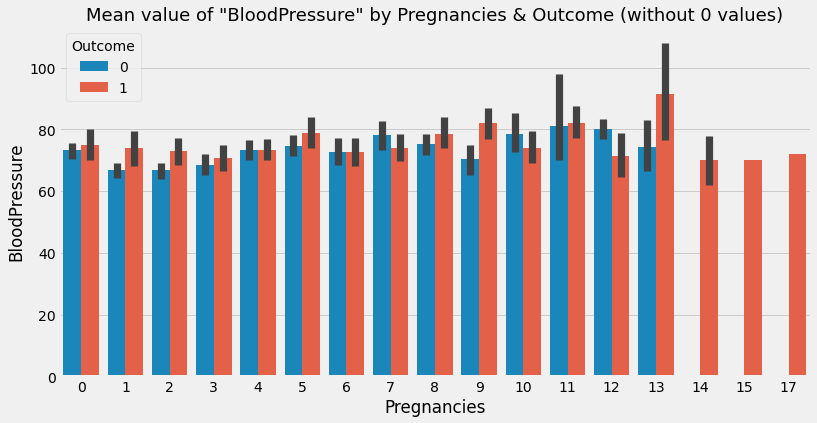

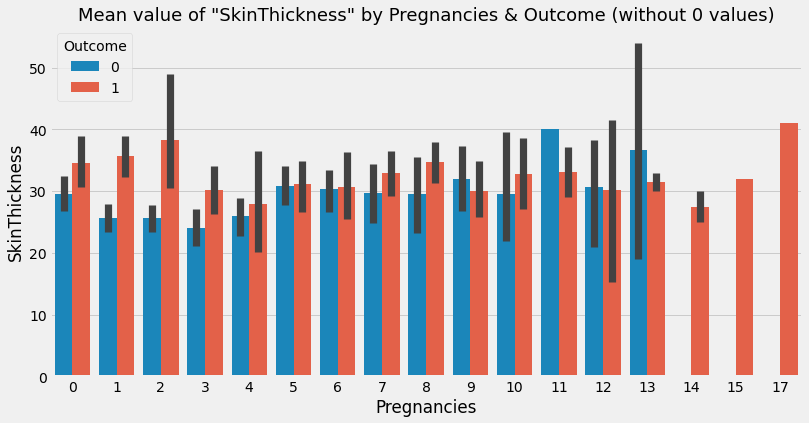

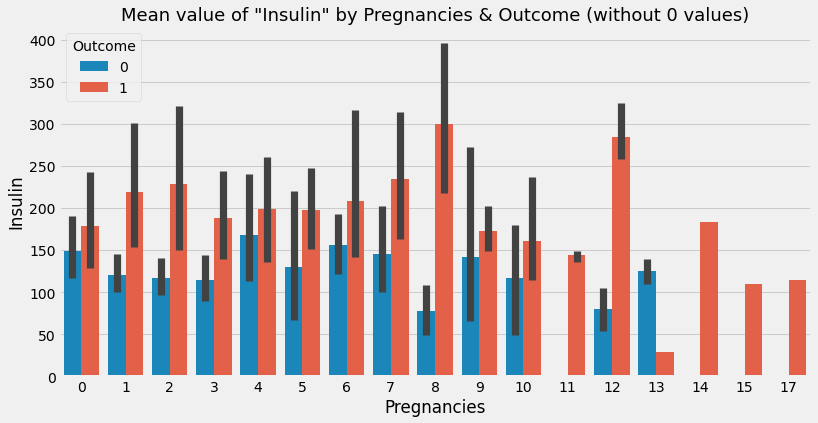

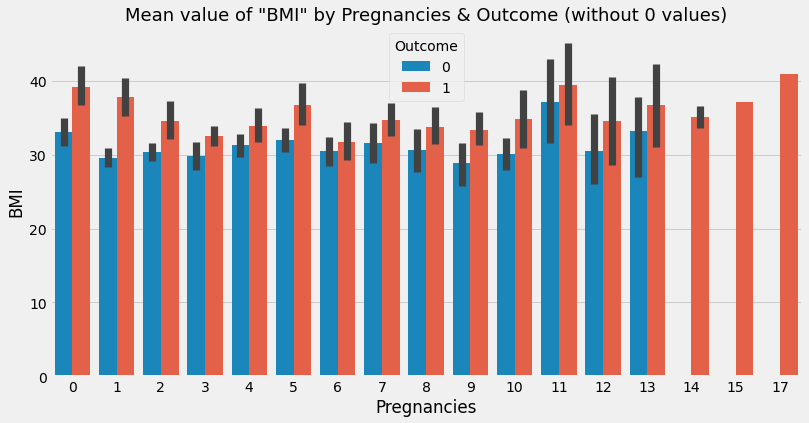

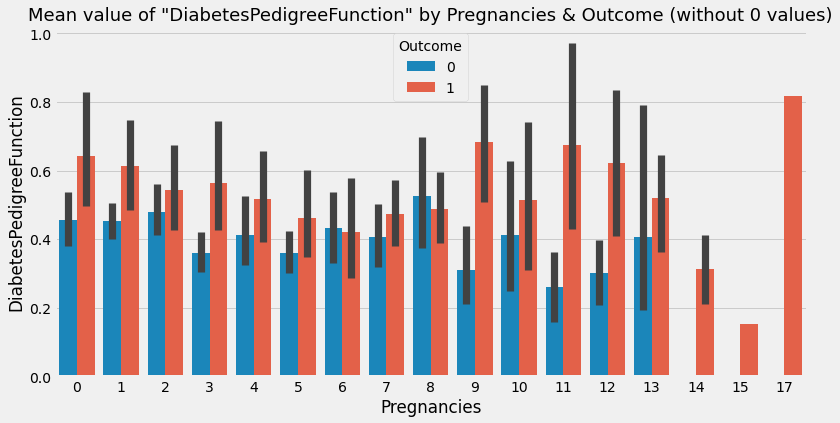

In [ ]:
for col in diabetes_df.drop(columns=['Pregnancies', 'Pregnancies_high', 'Outcome']).columns:
  plt.figure(figsize=(12, 6))
  sns.barplot(x='Pregnancies', y=col, hue='Outcome', data=diabetes_df[diabetes_df[col] != 0])
  plt.title(f'Mean value of "{col}" by Pregnancies & Outcome (without 0 values)', size=18)
  plt.show()
  print()

- Glucose, Insulin 속성에서는 임신 횟수와 관계없이 당뇨병 환자들의 평균 수치가 높게 형성되어 있음
- BMI 속성에서도 임신 횟수와 관계없이 당뇨병 환자들의 평균 수치가 미세하게나마 높게 형성되어 있음
- DiabetesPedigreeFunction 속성에서는 대체로 임신 횟수와 관계없이 당뇨병 환자들의 평균 수치가 높게 형성되어 있음

### 3) 임신 횟수별 환자-비환자 집단 간의 속성별 분포 비교 (boxplot)
- 두 속성의 조합(임신 횟수 & 다른 속성)이 당뇨병 발병율에 미치는 영향 시각화

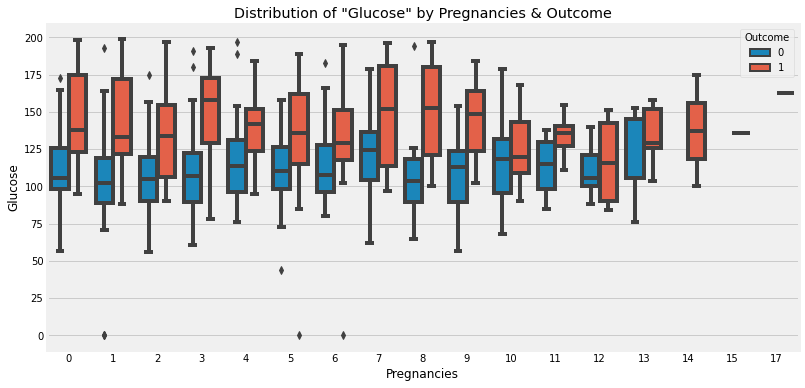

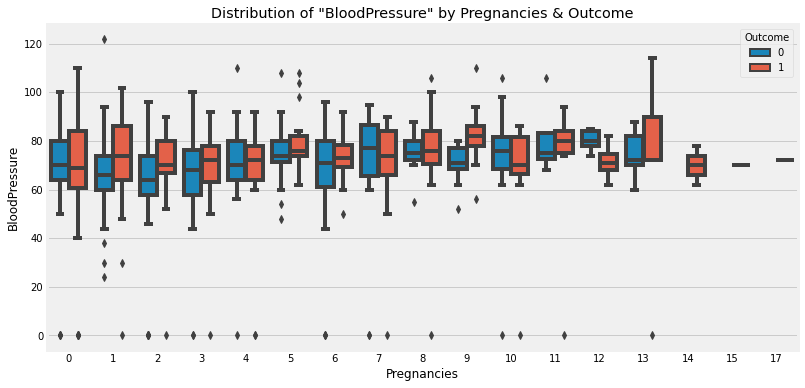

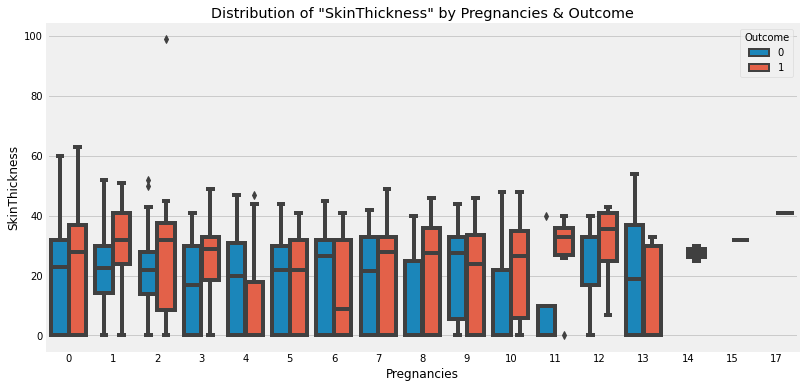

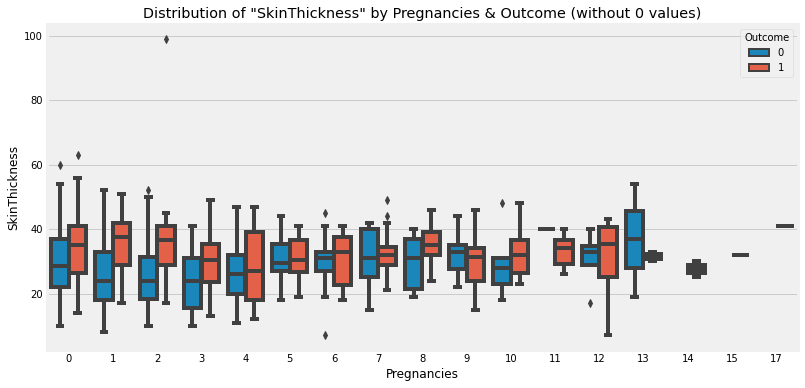

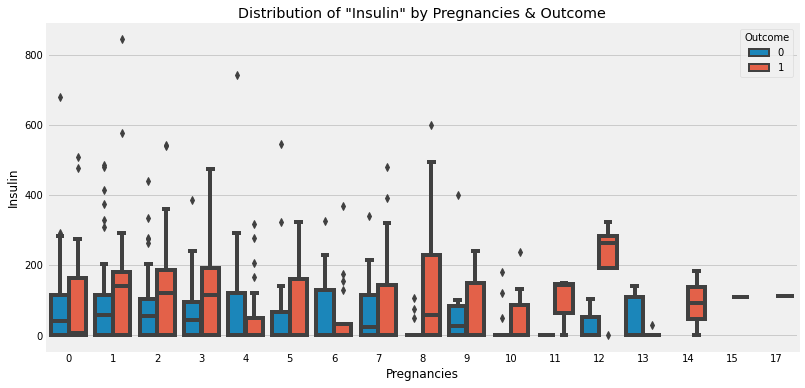

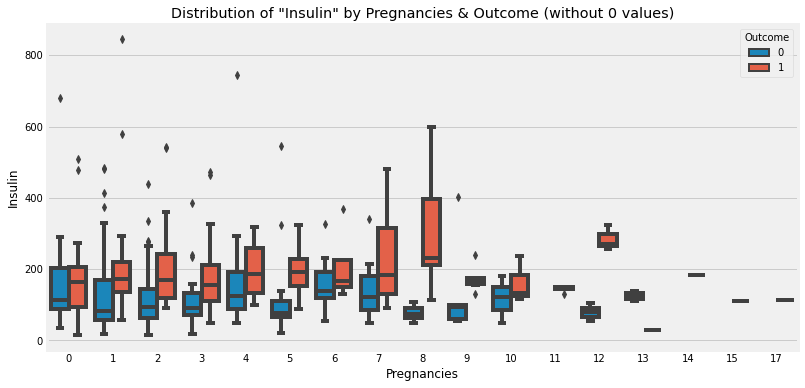

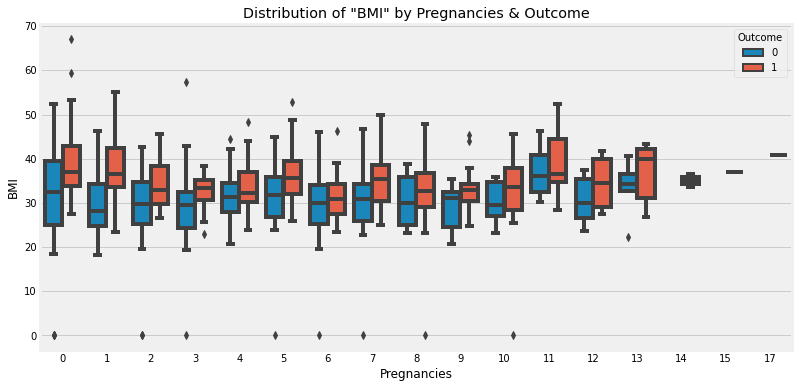

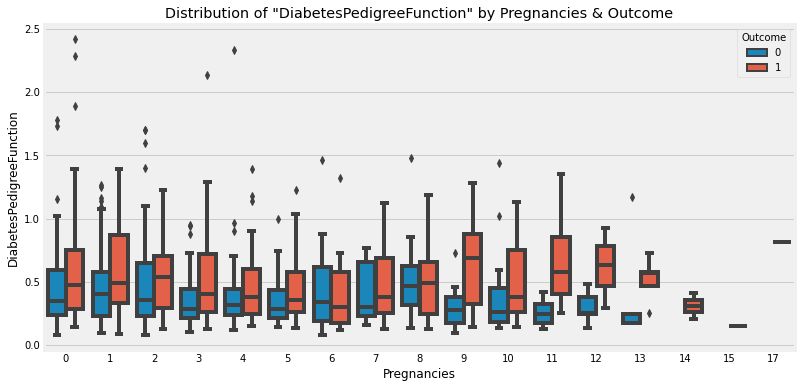

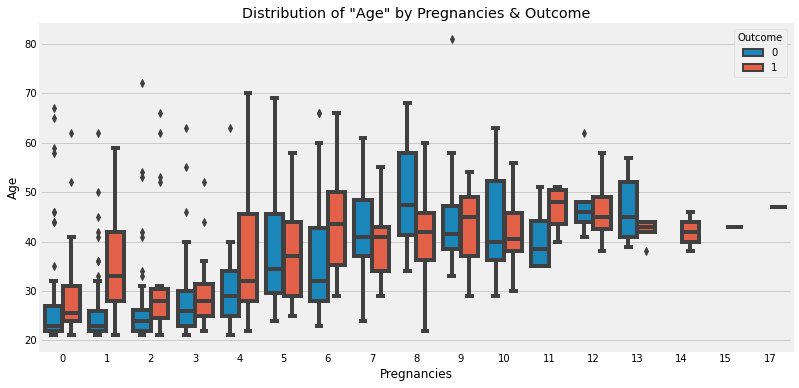

In [4]:
for col in diabetes_df.drop(columns=['Pregnancies', 'Pregnancies_high', 'Outcome']).columns:
  plt.figure(figsize=(12, 6))
  sns.boxplot(x='Pregnancies', y=col, hue='Outcome', data=diabetes_df)
  plt.title(f'Distribution of "{col}" by Pregnancies & Outcome')
  plt.show()
  print()

  if col in ['SkinThickness', 'Insulin']:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Pregnancies', y=col, hue='Outcome', data=diabetes_df[diabetes_df[col] > 0])
    plt.title(f'Distribution of "{col}" by Pregnancies & Outcome (without 0 values)')
    plt.show()
    print()

### 4) 임신 횟수별 환자-비환자 집단 간의 주요 속성별 평균값 비교 (violinplot)
- 속성별 boxplot 대신 violinplot을 통해 실제 분포를 더 자세하게 시각화
- 커널밀도함수(kdeplot)를 속성별로 생성해 세로로 세워놓은 모양
- boxplot에서 유의미한 차이가 보였던 일부 속성에 대해서만 시각화 적용함

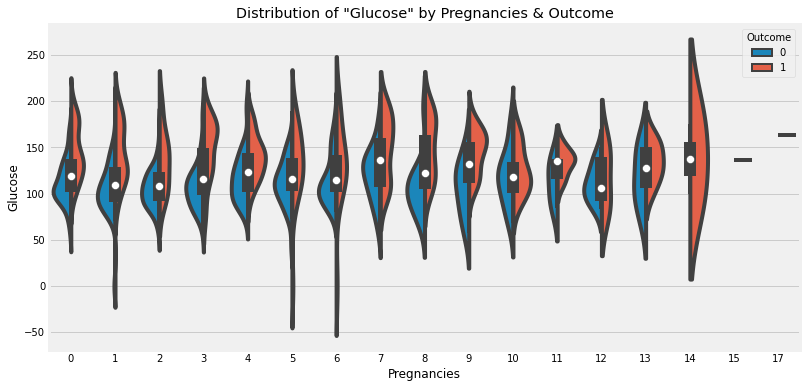

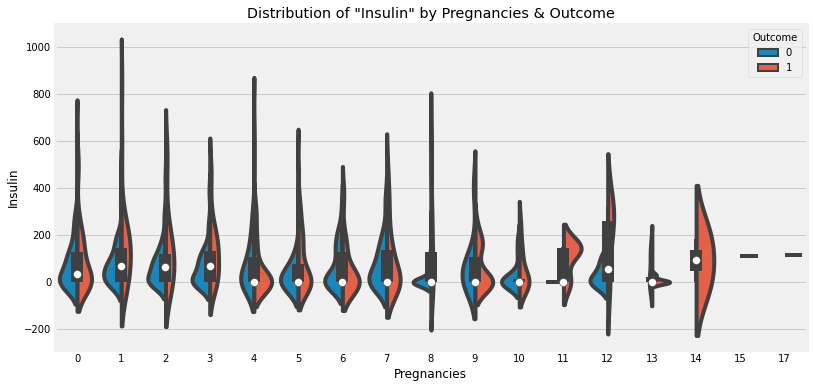

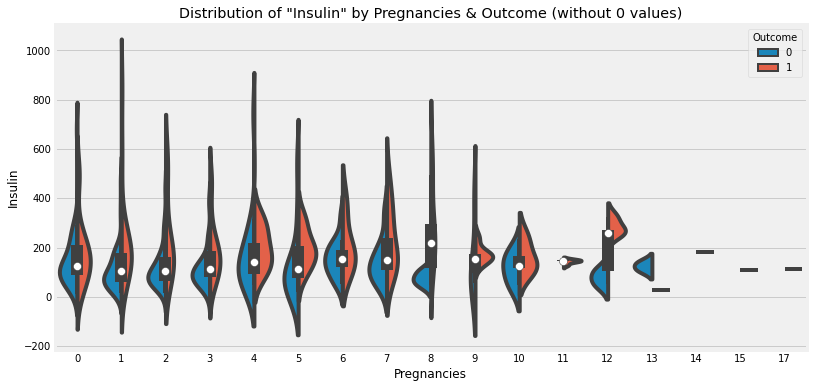

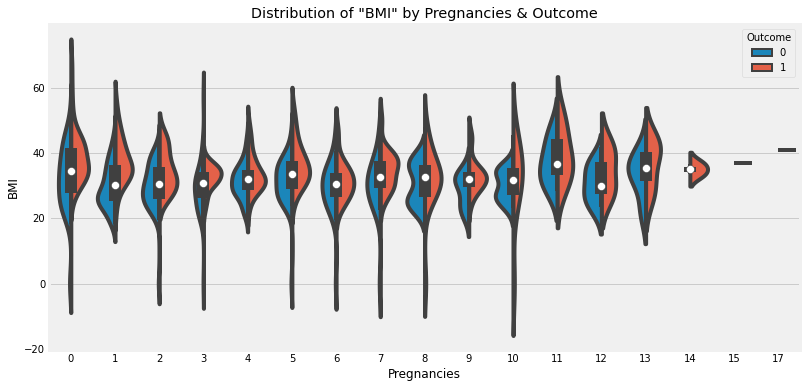

In [5]:
for col in ['Glucose', 'Insulin', 'BMI']:
  plt.figure(figsize=(12, 6))
  sns.violinplot(x='Pregnancies', y=col, hue='Outcome', data=diabetes_df, split=True)
  plt.title(f'Distribution of "{col}" by Pregnancies & Outcome')
  plt.show()
  print()
  
  if col in ['Insulin']:
    plt.figure(figsize=(12, 6))
    sns.violinplot(x='Pregnancies', y=col, hue='Outcome',
                   data=diabetes_df[diabetes_df[col] > 0], split=True)
    plt.title(f'Distribution of "{col}" by Pregnancies & Outcome (without 0 values)')
    plt.show()
    print()

### 5) 임신 횟수별 환자-비환자 집단 간의 주요 속성별 평균값 비교 (swarmplot)
- 속성별 boxplot 대신 swarmplot을 통해 실제 분포를 더 자세하게 시각화
- 각 데이터를 점으로 찍어 분포를 표현하기 때문에, 데이터 수가 적은 경우도 쉽게 파악 가능
- boxplot에서 유의미한 차이가 보였던 일부 속성에 대해서만 시각화 적용함

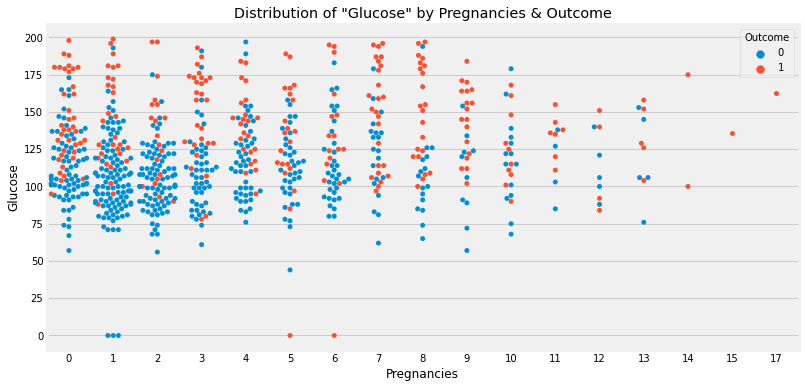

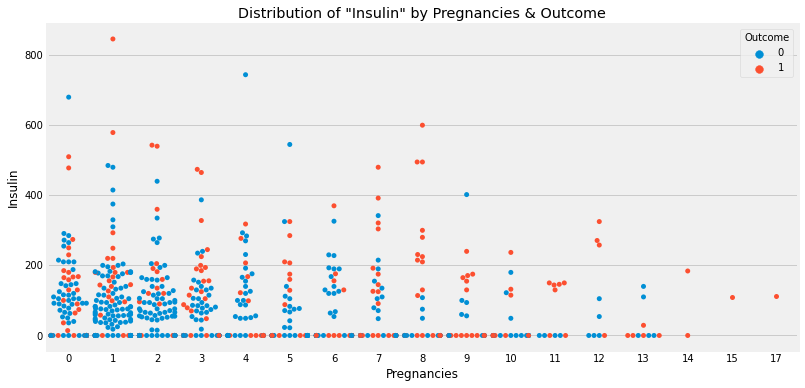

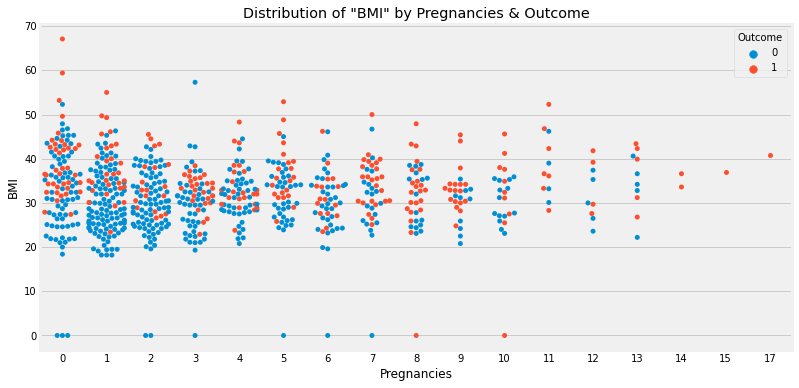

In [6]:
for col in ['Glucose', 'Insulin', 'BMI']:
  plt.figure(figsize=(12, 6))
  sns.swarmplot(x='Pregnancies', y=col, hue='Outcome', data=diabetes_df)
  plt.title(f'Distribution of "{col}" by Pregnancies & Outcome')
  plt.show()
  print()

## 2.1.5 수치형 변수의 분포를 정답값에 따라 시각화 해보기
- distplot
- Pregnancies 속성의 분포를 Outcome 속성에 따라 구분하여 시각화

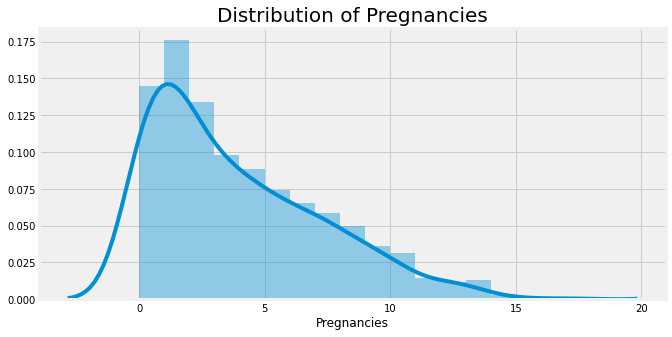

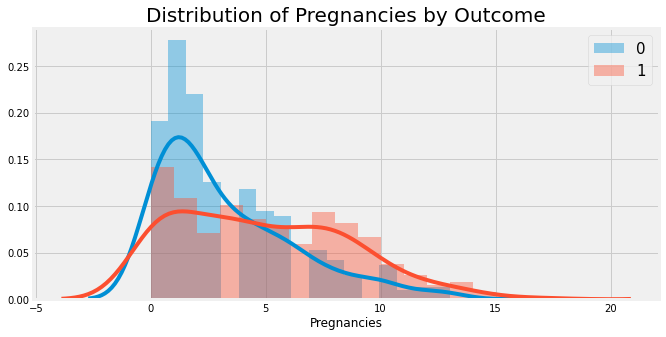

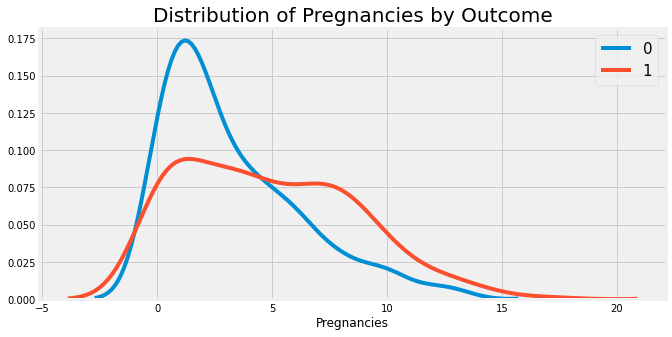

In [7]:
plt.figure(figsize=(10, 5))
sns.distplot(diabetes_df.Pregnancies,
             bins=diabetes_df.Pregnancies.max()).set_title('Distribution of Pregnancies', size=20)
plt.show()
print()

plt.figure(figsize=(10, 5))
sns.distplot(diabetes_df[diabetes_df.Outcome == 0].Pregnancies,
             bins=diabetes_df.Pregnancies.max(), label=0)
sns.distplot(diabetes_df[diabetes_df.Outcome == 1].Pregnancies,
             bins=diabetes_df.Pregnancies.max(), label=1)
plt.title('Distribution of Pregnancies by Outcome', size=20)
plt.legend(fontsize=15)
plt.show()
print()

plt.figure(figsize=(10, 5))
sns.distplot(diabetes_df[diabetes_df.Outcome == 0].Pregnancies,
             bins=diabetes_df.Pregnancies.max(), hist=False, label=0)
sns.distplot(diabetes_df[diabetes_df.Outcome == 1].Pregnancies,
             bins=diabetes_df.Pregnancies.max(), hist=False, label=1)
plt.title('Distribution of Pregnancies by Outcome', size=20)
plt.legend(fontsize=15)
plt.show()

## 2.1.6 서브플롯으로 모든 변수 한번에 시각화 하기
- df.hist()로 한 번에 전체 히스토그램 시각화
- plt.subplots() 사용해 여러 개의 수치형 속성에 대한 distplot 시각화

### 1) 전체 속성별 히스토그램 시각화 (df.hist())
- 수치형 속성들 각각의 분포 한 눈에 확인 가능

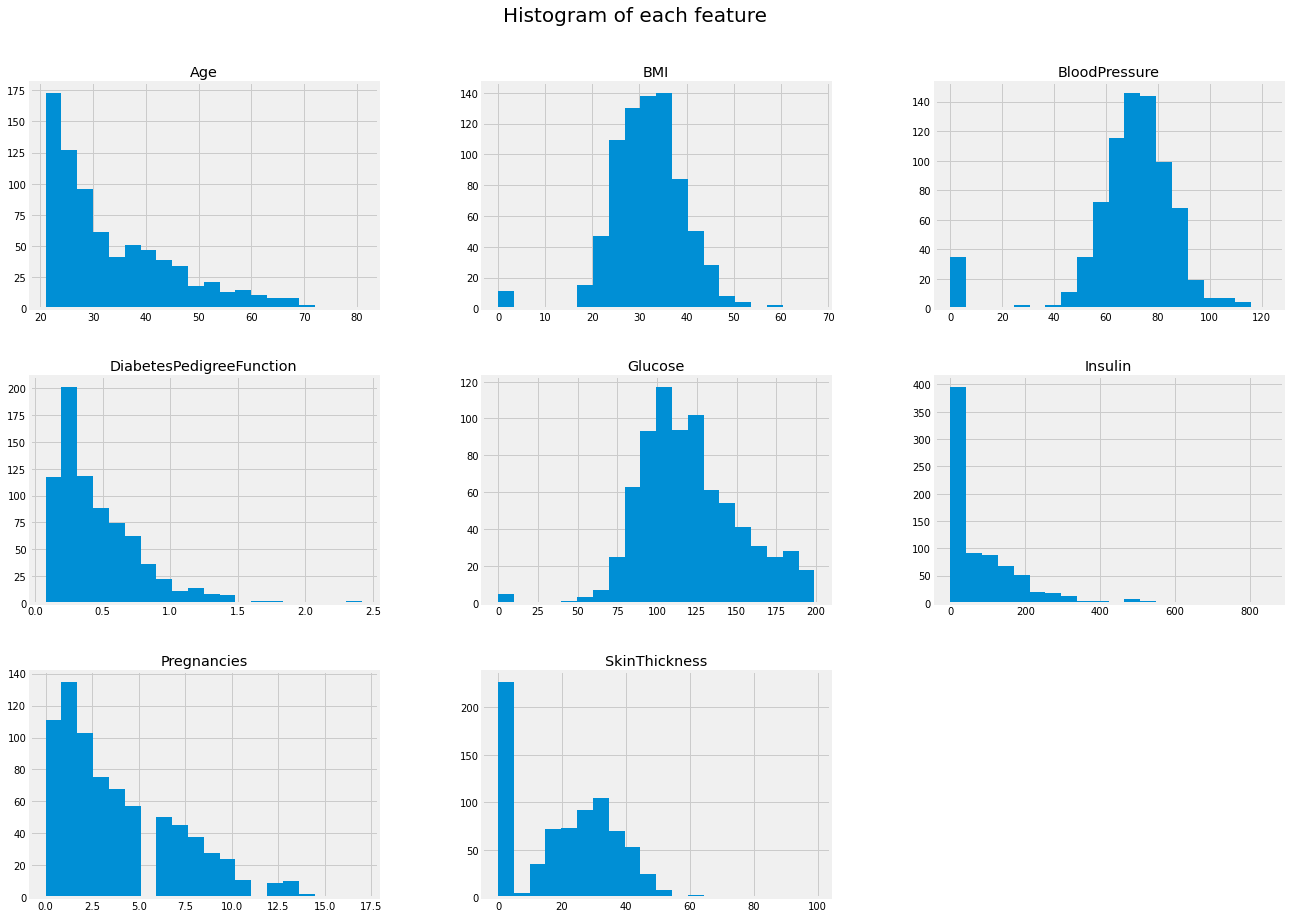

In [8]:
diabetes_df.drop(columns=['Outcome', 'Pregnancies_high']).hist(figsize=(20, 15), bins=20)
plt.suptitle('Histogram of each feature', size=20, y=0.95)
plt.show()

### 2) 여러 개의 수치형 속성에 대한 distplot 시각화 (plt.subplots())
- boxplot에서 유의미한 차이가 보였던 일부 속성에 대해서만 시각화 적용함

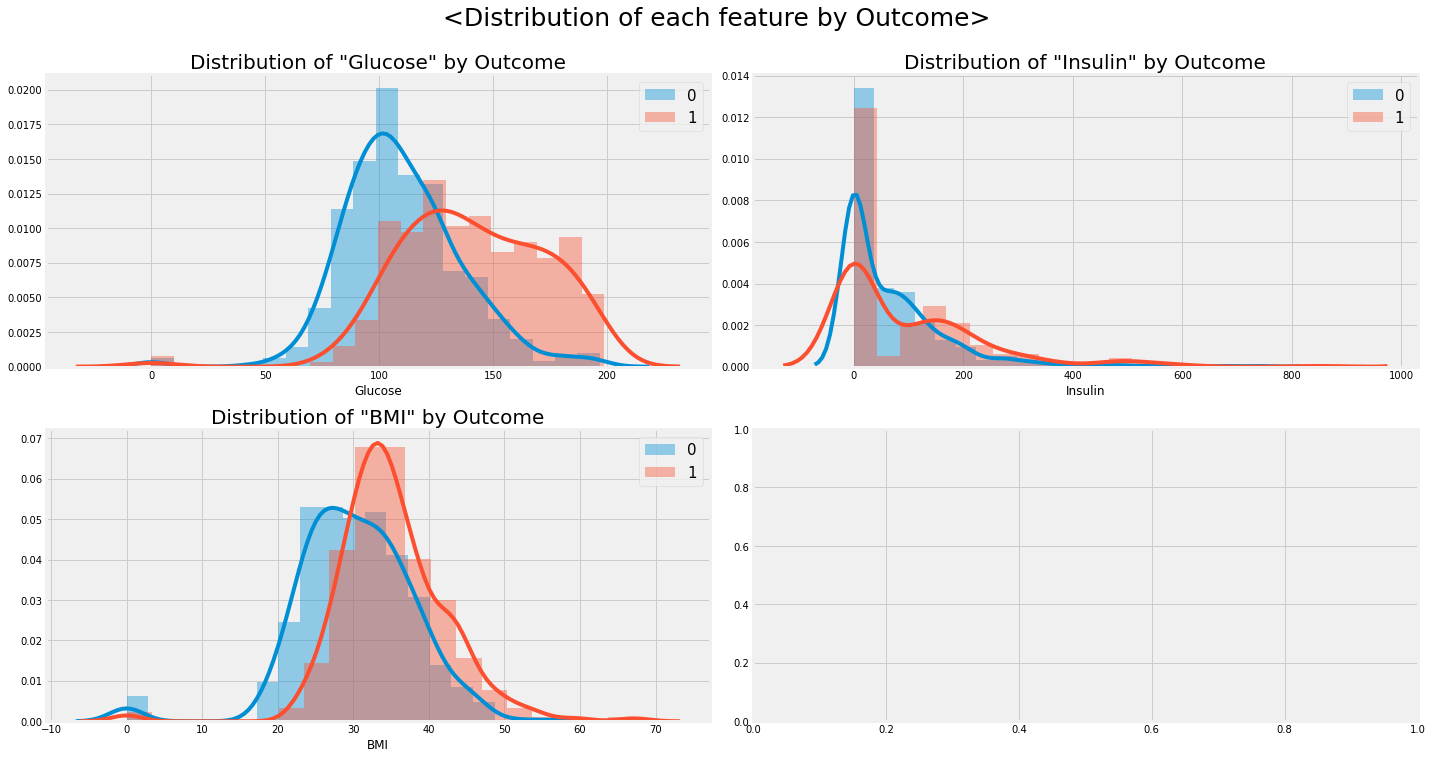

In [9]:
fig, ax = plt.subplots(2, 2, figsize=(20,10))
ax = ax.ravel()

for tmp_ax, col in zip(ax, ['Glucose', 'Insulin', 'BMI']):
  sns.distplot(diabetes_df[diabetes_df.Outcome == 0][col], bins=20,
               ax=tmp_ax, label=0)
  sns.distplot(diabetes_df[diabetes_df.Outcome == 1][col], bins=20,
               ax=tmp_ax, label=1)
  tmp_ax.set_title(f'Distribution of "{col}" by Outcome', size=20)
  tmp_ax.legend(fontsize=15)
plt.suptitle('<Distribution of each feature by Outcome>', size=25, y=1.05)
plt.tight_layout()